In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the data into a pandas DataFrame.  
gender_degree_data = pd.read_csv("/home/deepakm/testapps/data_science/percent-bachelors-degrees-women-usa.csv")  

# These are the "Tableau 20" colors as RGB.  
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]  

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.  
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)  

# You typically want your plot to be ~1.33x wider than tall. This plot is a rare  
# exception because of the number of lines being plotted on it.  
# Common sizes: (10, 7.5) and (12, 9)  
plt.figure(figsize=(12, 14))  

# Remove the plot frame lines. They are unnecessary chartjunk.  
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(False)  

# Ensure that the axis ticks only show up on the bottom and left of the plot.  
# Ticks on the right and top of the plot are generally unnecessary chartjunk.  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  

# Limit the range of the plot to only where the data is.  
# Avoid unnecessary whitespace.  
plt.ylim(0, 90)  
plt.xlim(1968, 2014)  

# Make sure your axis ticks are large enough to be easily read.  
# You don't want your viewers squinting to read your plot.  
plt.yticks(range(0, 91, 10), [str(x) + "%" for x in range(0, 91, 10)], fontsize=14)  
plt.xticks(fontsize=14)  

# Provide tick lines across the plot to help your viewers trace along  
# the axis ticks. Make sure that the lines are light and small so they  
# don't obscure the primary data lines.  
for y in range(10, 91, 10):  
    plt.plot(range(1968, 2012), [y] * len(range(1968, 2012)), "--", lw=0.5, color="black", alpha=0.3)  

# Remove the tick marks; they are unnecessary with the tick lines we just plotted.  
plt.tick_params(axis="both", which="both", bottom="off", top="off",  
                labelbottom="on", left="off", right="off", labelleft="on")  

# Now that the plot is prepared, it's time to actually plot the data!  
# Note that I plotted the majors in order of the highest % in the final year.  
majors = ['Health Professions', 'Public Administration', 'Education', 'Psychology',  
          'Foreign Languages', 'English', 'Communications\nand Journalism',  
          'Art and Performance', 'Biology', 'Agriculture',  
          'Social Sciences and History', 'Business', 'Math and Statistics',  
          'Architecture', 'Physical Sciences', 'Computer Science',  
          'Engineering']  

for rank, column in enumerate(majors):  
    # Plot each line separately with its own color, using the Tableau 20  
    # color set in order.  
    plt.plot(gender_degree_data.Year.values,  
            gender_degree_data[column.replace("\n", " ")].values,  
            lw=2.5, color=tableau20[rank])  

    # Add a text label to the right end of every line. Most of the code below  
    # is adding specific offsets y position because some labels overlapped.  
    y_pos = gender_degree_data[column.replace("\n", " ")].values[-1] - 0.5  
    if column == "Foreign Languages":  
        y_pos += 0.5  
    elif column == "English":  
        y_pos -= 0.5  
    elif column == "Communications\nand Journalism":  
        y_pos += 0.75  
    elif column == "Art and Performance":  
        y_pos -= 0.25  
    elif column == "Agriculture":  
        y_pos += 1.25  
    elif column == "Social Sciences and History":  
        y_pos += 0.25  
    elif column == "Business":  
        y_pos -= 0.75  
    elif column == "Math and Statistics":  
        y_pos += 0.75  
    elif column == "Architecture":  
        y_pos -= 0.75  
    elif column == "Computer Science":  
        y_pos += 0.75  
    elif column == "Engineering":  
        y_pos -= 0.25  

    # Again, make sure that all labels are large enough to be easily read  
    # by the viewer.  
    plt.text(2011.5, y_pos, column, fontsize=14, color=tableau20[rank])  

# matplotlib's title() call centers the title on the plot, but not the graph,  
# so I used the text() call to customize where the title goes.  

# Make the title big enough so it spans the entire plot, but don't make it  
# so big that it requires two lines to show.  

# Note that if the title is descriptive enough, it is unnecessary to include  
# axis labels; they are self-evident, in this plot's case.  
plt.text(1995, 93, "Percentage of Bachelor's degrees conferred to women in the U.S.A."  
       ", by major (1970-2012)", fontsize=17, ha="center")  

# Always include your data source(s) and copyright notice! And for your  
# data sources, tell your viewers exactly where the data came from,  
# preferably with a direct link to the data. Just telling your viewers  
# that you used data from the "U.S. Census Bureau" is completely useless:  
# the U.S. Census Bureau provides all kinds of data, so how are your  
# viewers supposed to know which data set you used?  
plt.text(1966, -8, "Data source: nces.ed.gov/programs/digest/2013menu_tables.asp"  
       "\nAuthor: Randy Olson (randalolson.com / @randal_olson)"  
       "\nNote: Some majors are missing because the historical data "  
       "is not available for them", fontsize=10)  

# Finally, save the figure as a PNG.  
# You can also save it as a PDF, JPEG, etc.  
# Just change the file extension in this call.  
# bbox_inches="tight" removes all the extra whitespace on the edges of your plot.  
plt.savefig("percent-bachelors-degrees-women-usa.png", bbox_inches="tight")
plt.show()


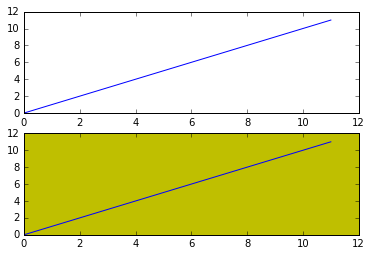

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
# plot a line, implicitly creating a subplot(111)
plt.plot([1,2,3])
# now create a subplot which represents the top plot of a grid
# with 2 rows and 1 column. Since this subplot will overlap the
# first, the plot (and its axes) previously created, will be removed
plt.subplot(211)
plt.plot(range(12))
plt.subplot(212, axisbg='y') # creates 2nd subplot with yellow background
plt.plot(range(12))
plt.show()